In [2]:
import pandas as pd
df = pd.read_csv('data_cleaned.csv')
df = df.iloc[:, 1:]

In [4]:
pd.set_option('display.max_columns', None)
df.head()

(124222, 37)

In [3]:
df['season'].min(), df['season'].max()

(2000, 2019)

In [4]:
# import numpy as np

# df = df.groupby(['player_id', 'tm', 'player', 'pos', 'season'], as_index=False)\
#     .agg({
#     'offensive_snapcount': np.sum,
#     'offensive_snapcount_percentage': np.mean,
#     'passing_rating': np.mean,
#     'passing_yds': np.sum,
#     'passing_td': np.sum,
#     'passing_att': np.sum,
#     'receiving_yds': np.sum,
#     'receiving_td': np.sum,
#     'receiving_rec': np.sum,
#     'receiving_tar': np.sum,
#     'rushing_att': np.sum,
#     'standard_fantasy_points': np.sum,
#     'ppr_fantasy_points': np.sum,
#     'half_ppr_fantasy_points': np.sum
# })

# df.head()

In [5]:
df.columns

Index(['player_id', 'tm', 'pos', 'player', 'season', 'week', 'NFL_draft_year',
       'NFL_draft_round', 'NFL_draft_rank', 'height_inches', 'weight_pounds',
       'forty_yd', 'three_cone', 'bench', 'broad_jump', 'combine_height',
       'shuttle', 'vertical', 'offensive_snapcount',
       'offensive_snapcount_percentage', 'passing_int', 'passing_rating',
       'passing_yds', 'passing_two_pt_md', 'passing_td', 'passing_att',
       'receiving_yds', 'receiving_td', 'receiving_rec', 'receiving_tar',
       'rushing_att', 'rushing_td', 'rushing_yds', 'fumbles_lost',
       'half_ppr_fantasy_points', 'ppr_fantasy_points',
       'standard_fantasy_points'],
      dtype='object')

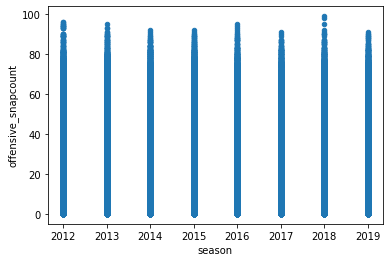

In [6]:
df.plot(x='season', y='offensive_snapcount', kind='scatter');

In [7]:
df = df.loc[(df['season'] >= 2012)]

df.shape

(49953, 37)

In [8]:
pd.set_option('chained_assignment', None)

lag_features = [ # Quater Backs
                'rushing_att', 
                'receiving_tar', 
                'offensive_snapcount', 
                'offensive_snapcount_percentage',
                'ppr_fantasy_points',
                'passing_rating',
                'passing_att', 
                'passing_td'
                ]
                [ # Wide Receivers
                'ppr_fantasy_points',
                'receiving_yds',
                'receiving_rec',
                'receiving_tar',
                'receiving_td',
                'offensive_snapcount',
                'offensive_snapcount_percentage'
                ]
                [ # Running Backs
                    'ppr_fantasy_points',
                    'half_ppr_fantasy_points',
                    'standard_fantasy_points',
                    'rushing_yds',
                    'rushing_att',
                    'offensive_snapcount',
                    'offensive_snapcount_percentage',
                    'receiving_rec',
                    'receiving_yds',
                    'receiving_tar',
                    'rushing_td'	
                ]

for lag in range(1, 6):
    
    """
    We have not talked about shift before.
    Shift moves our data down by the number of rows we specify.
    
    pandas.DataFrame.shift documentation
    
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
    """
    
    shifted = df.groupby('player_id').shift(lag)
    
    for column in lag_features:
        """
        Python f-strings are similar to using the format string method, although a bit cleaner
        
        Article on Python f-strings
        
        https://realpython.com/python-f-strings/
        """
        
        df[f'lag_{column}_{lag}'] = shifted[column]
        
df = df.fillna(-1)

In [9]:
"""
Correlation matrix for all positions
"""
df.corr()[['ppr_fantasy_points']]

ppr_fantasy_points
player_id                                      -0.105866
season                                          0.007784
week                                           -0.015028
NFL_draft_year                                  0.241122
NFL_draft_round                                 0.000140
...                                                  ...
lag_offensive_snapcount_percentage_5            0.473702
lag_ppr_fantasy_points_5                        0.474284
lag_passing_rating_5                            0.298531
lag_passing_att_5                               0.302862
lag_passing_td_5                                0.274656

[74 rows x 1 columns]

In [10]:
"""
Correlation matrix for just wide receivers.
"""
pd.set_option('display.max_rows', None)
df.loc[df['pos'] == 'WR'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False)

ppr_fantasy_points
ppr_fantasy_points                              1.000000
half_ppr_fantasy_points                         0.996325
standard_fantasy_points                         0.979266
receiving_yds                                   0.932960
receiving_rec                                   0.891068
receiving_tar                                   0.815382
receiving_td                                    0.724901
offensive_snapcount                             0.653716
offensive_snapcount_percentage                  0.639742
lag_offensive_snapcount_percentage_1            0.551325
lag_offensive_snapcount_1                       0.542580
lag_receiving_tar_1                             0.523839
lag_offensive_snapcount_percentage_2            0.518146
lag_offensive_snapcount_2                       0.507521
lag_receiving_tar_2                             0.498202
lag_offensive_snapcount_percentage_3            0.497811
lag_offensive_snapcount_3                       0.492344
lag_receiving_tar_3                             0.490865
lag_offensive_snapcount_percentage_4            0.476681
lag_offensive_snapcount_4                       0.470512
lag_receiving_tar_4                             0.469505
lag_ppr_fantasy_points_1                        0.468697
lag_offensive_snapcount_percentage_5            0.459266
lag_receiving_tar_5                             0.458669
lag_ppr_fantasy_points_2                        0.458446
lag_offensive_snapcount_5                       0.451075
lag_ppr_fantasy_points_3                        0.449303
lag_ppr_fantasy_points_4                        0.433094
lag_ppr_fantasy_points_5                        0.431260
NFL_draft_year                                  0.218347
combine_height                                  0.210952
forty_yd                                        0.205055
lag_passing_att_5                               0.143859
lag_passing_td_5                                0.142985
lag_passing_td_4                                0.132344
lag_passing_att_4                               0.132162
lag_passing_td_3                                0.121679
lag_passing_att_3                               0.121644
rushing_yds                                     0.107816
shuttle                                         0.105979
lag_passing_att_2                               0.103830
lag_passing_td_2                                0.103782
lag_rushing_att_5                               0.100934
vertical                                        0.097986
lag_rushing_att_4                               0.095546
lag_rushing_att_3                               0.094899
passing_two_pt_md                               0.092796
rushing_att                                     0.090566
three_cone                                      0.090256
lag_rushing_att_2                               0.086156
broad_jump                                      0.085091
rushing_td                                      0.080425
lag_passing_att_1                               0.079007
lag_passing_td_1                                0.077530
lag_rushing_att_1                               0.076149
bench                                           0.074764
weight_pounds                                   0.067931
passing_rating                                  0.058321
passing_td                                      0.049146
lag_passing_rating_5                            0.044678
passing_yds                                     0.044477
passing_att                                     0.042833
lag_passing_rating_2                            0.042367
height_inches                                   0.042055
fumbles_lost                                    0.034366
lag_passing_rating_3                            0.033321
lag_passing_rating_1                            0.032677
lag_passing_rating_4                            0.031316
NFL_draft_round                                 0.023967
passing_int                                    -

In [35]:
"""
Correlation matrix for just running backs.
"""

df.loc[df['pos'] == 'RB'].corr()[['ppr_fantasy_points']].sort_values(by='ppr_fantasy_points', ascending=False)

ppr_fantasy_points
ppr_fantasy_points                              1.000000
half_ppr_fantasy_points                         0.995637
standard_fantasy_points                         0.979414
rushing_yds                                     0.802364
rushing_att                                     0.765147
offensive_snapcount                             0.754559
offensive_snapcount_percentage                  0.740884
receiving_rec                                   0.694789
receiving_yds                                   0.682518
receiving_tar                                   0.680842
rushing_td                                      0.675344
lag_offensive_snapcount_percentage_1            0.593287
lag_offensive_snapcount_1                       0.586550
lag_rushing_att_1                               0.577525
lag_ppr_fantasy_points_1                        0.563065
lag_offensive_snapcount_percentage_2            0.545162
lag_rushing_att_2                               0.536912
lag_offensive_snapcount_2                       0.535605
lag_ppr_fantasy_points_2                        0.528458
lag_offensive_snapcount_percentage_3            0.512963
lag_rushing_att_3                               0.510624
lag_offensive_snapcount_3                       0.505303
lag_ppr_fantasy_points_3                        0.498728
lag_offensive_snapcount_percentage_4            0.482798
lag_rushing_att_4                               0.478601
lag_offensive_snapcount_4                       0.474660
lag_rushing_att_5                               0.468690
lag_ppr_fantasy_points_4                        0.468554
lag_ppr_fantasy_points_5                        0.461978
lag_receiving_tar_1                             0.461019
lag_offensive_snapcount_percentage_5            0.459425
lag_offensive_snapcount_5                       0.452732
lag_receiving_tar_2                             0.438354
lag_receiving_tar_3                             0.411245
receiving_td                                    0.406179
lag_receiving_tar_4                             0.389387
lag_receiving_tar_5                             0.373095
combine_height                                  0.243816
forty_yd                                        0.236680
NFL_draft_year                                  0.230418
vertical                                        0.185552
broad_jump                                      0.165170
passing_two_pt_md                               0.115295
shuttle                                         0.114494
bench                                           0.102415
lag_passing_att_5                               0.096516
lag_passing_td_5                                0.096466
lag_passing_att_3                               0.095025
three_cone                                      0.094980
lag_passing_att_4                               0.093001
lag_passing_td_3                                0.091669
lag_passing_td_4                                0.091617
lag_passing_att_2                               0.083114
fumbles_lost                                    0.081361
lag_passing_td_2                                0.079425
lag_passing_att_1                               0.068770
lag_passing_td_1                                0.063814
passing_att                                     0.060900
passing_rating                                  0.059201
season                                          0.045390
lag_passing_rating_3                            0.042555
passing_td                                      0.041363
lag_passing_rating_1                            0.032652
passing_yds                                     0.031710
lag_passing_rating_4                            0.023995
lag_passing_rating_2                            0.021809
lag_passing_rating_5                            0.021095
NFL_draft_round                                 0.013362
week                                            0.004633
passing_int                                    -

In [12]:
"""
Correlation matrix for just quarterbacks.
"""

df.loc[df['pos'] == 'QB'].corr()[['ppr_fantasy_points']]

ppr_fantasy_points
player_id                                      -0.055230
season                                          0.037327
week                                           -0.061912
NFL_draft_year                                  0.162244
NFL_draft_round                                -0.094207
NFL_draft_rank                                 -0.151297
height_inches                                   0.000708
weight_pounds                                   0.022126
forty_yd                                        0.124921
three_cone                                      0.101900
bench                                          -0.045696
broad_jump                                      0.072474
combine_height                                  0.139801
shuttle                                         0.067570
vertical                                        0.050872
offensive_snapcount                             0.671807
offensive_snapcount_percentage                  0.641113
passing_int                                    -0.052895
passing_rating                                  0.755567
passing_yds                                     0.802902
passing_two_pt_md                               0.060490
passing_td                                      0.844373
passing_att                                     0.623842
receiving_yds                                  -0.006226
receiving_td                                    0.021345
receiving_rec                                  -0.018680
receiving_tar                                  -0.031504
rushing_att                                     0.379828
rushing_td                                      0.316482
rushing_yds                                     0.361070
fumbles_lost                                    0.021595
half_ppr_fantasy_points                         0.999767
ppr_fantasy_points                              1.000000
standard_fantasy_points                         0.999069
lag_rushing_att_1                               0.261849
lag_receiving_tar_1                            -0.025209
lag_offensive_snapcount_1                       0.476757
lag_offensive_snapcount_percentage_1            0.485920
lag_ppr_fantasy_points_1                        0.443551
lag_passing_rating_1                            0.411124
lag_passing_att_1                               0.444259
lag_passing_td_1                                0.350326
lag_rushing_att_2                               0.247156
lag_receiving_tar_2                            -0.002366
lag_offensive_snapcount_2                       0.430561
lag_offensive_snapcount_percentage_2            0.439027
lag_ppr_fantasy_points_2                        0.396826
lag_passing_rating_2                            0.375104
lag_passing_att_2                               0.403325
lag_passing_td_2                                0.318434
lag_rushing_att_3                               0.256637
lag_receiving_tar_3                             0.026830
lag_offensive_snapcount_3                       0.417421
lag_offensive_snapcount_percentage_3            0.418661
lag_ppr_fantasy_points_3                        0.389494
lag_passing_rating_3                            0.366683
lag_passing_att_3                               0.396928
lag_passing_td_3                                0.323784
lag_rushing_att_4                               0.261878
lag_receiving_tar_4                             0.039791
lag_offensive_snapcount_4                       0.394792
lag_offensive_snapcount_percentage_4            0.394633
lag_ppr_fantasy_points_4                        0.375227
lag_passing_rating_4                            0.359683
lag_passing_att_4                               0.371949
lag_passing_td_4                                0.312846
lag_rushing_att_5                               0.252243
lag_receiving_tar_5                             0.048710
lag_offensive_snapcount_5                       0.372538
lag_offensive_snapcount_percentage_5            

In [13]:
"""
Correlation matrix for just tight ends.
"""
df.loc[df['pos'] == 'TE'].corr()[['ppr_fantasy_points']]

ppr_fantasy_points
player_id                                      -0.095664
season                                         -0.013129
week                                           -0.015797
NFL_draft_year                                  0.215815
NFL_draft_round                                 0.028080
NFL_draft_rank                                 -0.049928
height_inches                                   0.064968
weight_pounds                                   0.034564
forty_yd                                        0.173967
three_cone                                      0.050276
bench                                           0.106431
broad_jump                                      0.086446
combine_height                                  0.178448
shuttle                                         0.033212
vertical                                        0.116277
offensive_snapcount                             0.624137
offensive_snapcount_percentage                  0.604710
passing_int                                     0.019876
passing_rating                                  0.000578
passing_yds                                     0.007297
passing_two_pt_md                               0.081242
passing_td                                           NaN
passing_att                                     0.004670
receiving_yds                                   0.917027
receiving_td                                    0.729813
receiving_rec                                   0.903538
receiving_tar                                   0.843333
rushing_att                                     0.065263
rushing_td                                      0.068801
rushing_yds                                     0.067788
fumbles_lost                                    0.064037
half_ppr_fantasy_points                         0.996077
ppr_fantasy_points                              1.000000
standard_fantasy_points                         0.976926
lag_rushing_att_1                               0.060024
lag_receiving_tar_1                             0.523002
lag_offensive_snapcount_1                       0.511465
lag_offensive_snapcount_percentage_1            0.521133
lag_ppr_fantasy_points_1                        0.469517
lag_passing_rating_1                            0.018012
lag_passing_att_1                               0.061100
lag_passing_td_1                                0.059627
lag_rushing_att_2                               0.066078
lag_receiving_tar_2                             0.507834
lag_offensive_snapcount_2                       0.478749
lag_offensive_snapcount_percentage_2            0.487493
lag_ppr_fantasy_points_2                        0.451318
lag_passing_rating_2                            0.013679
lag_passing_att_2                               0.078296
lag_passing_td_2                                0.076931
lag_rushing_att_3                               0.065280
lag_receiving_tar_3                             0.498264
lag_offensive_snapcount_3                       0.458731
lag_offensive_snapcount_percentage_3            0.464524
lag_ppr_fantasy_points_3                        0.453196
lag_passing_rating_3                            0.019549
lag_passing_att_3                               0.089884
lag_passing_td_3                                0.089281
lag_rushing_att_4                               0.071022
lag_receiving_tar_4                             0.470206
lag_offensive_snapcount_4                       0.441643
lag_offensive_snapcount_percentage_4            0.446836
lag_ppr_fantasy_points_4                        0.438657
lag_passing_rating_4                            0.018199
lag_passing_att_4                               0.101571
lag_passing_td_4                                0.101936
lag_rushing_att_5                               0.078678
lag_receiving_tar_5                             0.458711
lag_offensive_snapcount_5                       0.421906
lag_offensive_snapcount_percentage_5            

In [14]:
wr_df = df.loc[(df['pos'] == 'WR') & (df['season'] < 2019)]
wr_df.shape

(16911, 77)

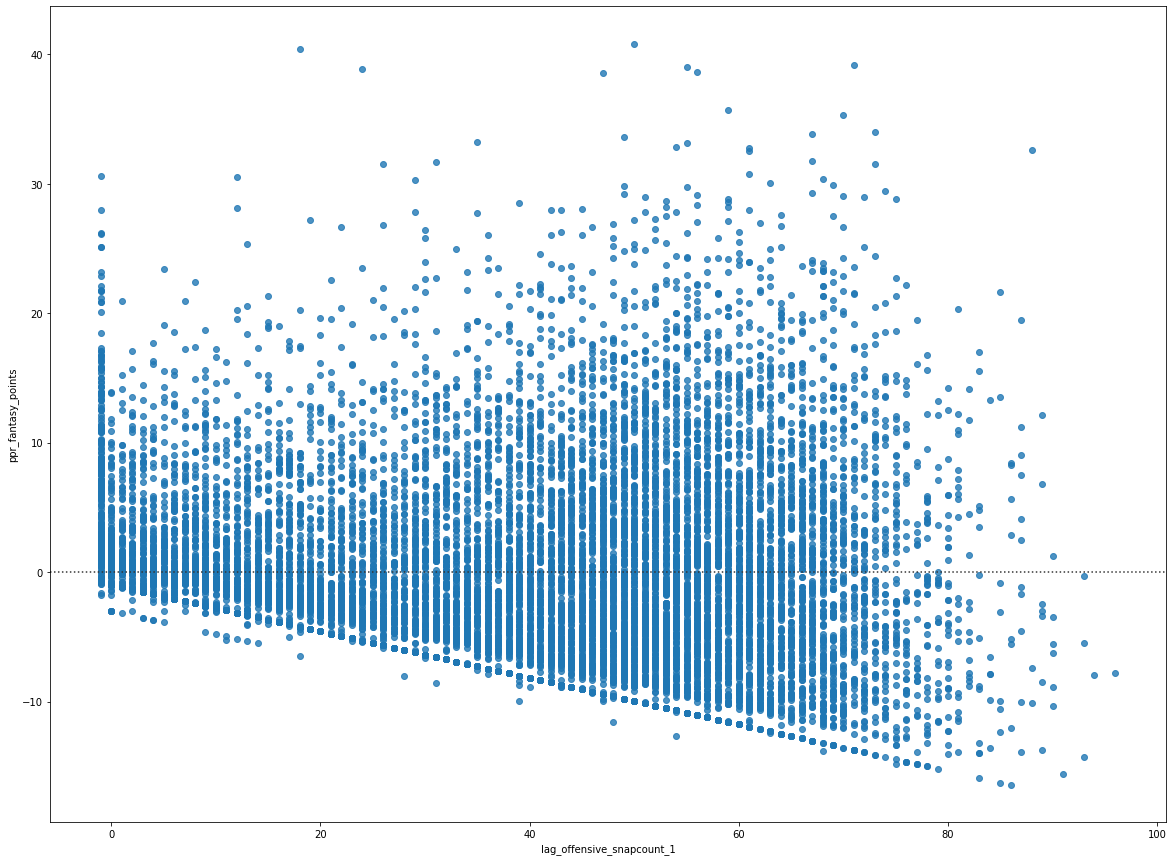

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, scatter = plt.subplots(figsize = (20,15))
sns.residplot(x=wr_df['lag_offensive_snapcount_1'], y=wr_df['ppr_fantasy_points']);

In [16]:
wr_df = wr_df.loc[wr_df['lag_offensive_snapcount_1'] > 50]
wr_df.shape

(5067, 77)

In [36]:
"""
This is our feature matrix.
"""

X = wr_df[[
    'lag_receiving_tar_1',
    'lag_offensive_snapcount_1',
    'lag_ppr_fantasy_points_1'	
]].values

y = wr_df['ppr_fantasy_points'].values

X.shape, y.shape

((5067, 9), (5067,))

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# split up our data in to 20% testing, 80% training
# train_test_split documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# sklearn.linear_model.LinearRegression documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lr = LinearRegression()

#poly_features = PolynomialFeatures(degree=3, include_bias=False)
#X_train = poly_features.fit_transform(X_train)

# train the algorithm
# the fit method documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
lr.fit(X_train, y_train)

"""
Predicted values based off testing data. We are going to compare these predicted values to 
real world values and try to quantify the difference between our model and reality
"""
# predict method documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#X_test = poly_features.fit_transform(X_test)
y_pred = lr.predict(X_test)

"""
A mean absolute error of 47 means our model was on average off by 47 fantasy points, or 3 points per game.
This is about what we'd expect from such a simple model.
"""
# mean_absolute_error documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
mean_absolute_error(y_pred, y_test)

0.27111732518470305

In [41]:
pd.set_option('display.max_rows', None)

wr_df_pred = df.loc[
    (df['pos'] == 'WR') & (df['offensive_snapcount'] > 50) & (df['season'] == 2019), 
    ['player', 'week', 'receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']
]

# poly_features.fit_transform()
wr_df_pred['predicted_2020'] = lr.predict(wr_df_pred[['receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']].values)

wr_df_pred.sort_values(by='predicted_2020', ascending=False).head(100)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)